In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv 

In [258]:
loan_df=pd.read_csv('loan.csv')

In [260]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Getting column details

In [263]:
cols = loan_df.columns.unique()
col_list = cols.to_list()
len(col_list)
print(col_list)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [265]:
loan_df.shape

(39717, 111)

# 1. Data Cleaning 

In [268]:
# checking null values  in each column 
null_value_count_per_col=loan_df.isnull().sum()
null_value_count_per_col.to_dict()

{'id': 0,
 'member_id': 0,
 'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 2459,
 'emp_length': 1075,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'pymnt_plan': 0,
 'url': 0,
 'desc': 12942,
 'purpose': 0,
 'title': 11,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 25682,
 'mths_since_last_record': 36931,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 50,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 71,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 38577,
 'last_credit_pull_d': 2,
 'collections_12_mths_ex_med': 56,
 'mt

### - Drop columns with all NAN 

In [271]:
cleaned_loan_df = loan_df.dropna(how='all', axis=1)
cleaned_loan_df.columns.unique()
cleaned_loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [274]:
cleaned_loan_df.shape

(39717, 57)

### - Check if any  Duplicates 

In [277]:
#check if any duplicate data exists 
duplicate_vals = cleaned_loan_df[cleaned_loan_df.duplicated()]
duplicate_vals

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [278]:
#checking null value count per column 
cleaned_loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [281]:
#nan percentage per column 
nan_percentage = (cleaned_loan_df.isna().sum() / len(cleaned_loan_df)) * 100
nan_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [283]:
cleaned_loan_df.drop(["next_pymnt_d" , "mths_since_last_record"] , axis=1 , inplace = True)  

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/3355788691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loan_df.drop(["next_pymnt_d" , "mths_since_last_record"] , axis=1 , inplace = True)


In [285]:
cleaned_loan_df.shape

(39717, 55)

In [287]:
#get the number of unique values in each column
cleaned_loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [289]:
drop_col = cleaned_loan_df.nunique()
drop_col_list = drop_col[drop_col <= 1].index.tolist()
drop_col_list

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [291]:
#remove columns which are listed above 
cleaned_loan_df.drop(drop_col_list , axis=1 , inplace = True)  

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/2548261524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loan_df.drop(drop_col_list , axis=1 , inplace = True)


In [293]:
#get shape of cleaned data frame 
cleaned_loan_df.shape

(39717, 46)

In [295]:
cleaned_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [297]:
cleaned_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [299]:
cleaned_loan_df.drop(['url','desc','zip_code','pub_rec','member_id','id','emp_title','title','earliest_cr_line','inq_last_6mths','revol_bal','revol_util','out_prncp','out_prncp_inv','total_rec_late_fee','total_rec_int','last_credit_pull_d','recoveries','collection_recovery_fee','mths_since_last_delinq'] , axis=1 , inplace = True)  

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/3986087209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loan_df.drop(['url','desc','zip_code','pub_rec','member_id','id','emp_title','title','earliest_cr_line','inq_last_6mths','revol_bal','revol_util','out_prncp','out_prncp_inv','total_rec_late_fee','total_rec_int','last_credit_pull_d','recoveries','collection_recovery_fee','mths_since_last_delinq'] , axis=1 , inplace = True)


In [301]:
cleaned_loan_df.shape

(39717, 26)

In [303]:
cleaned_loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_d',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [305]:
cleaned_loan_df.nunique()

loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
purpose                    14
addr_state                 50
dti                      2868
delinq_2yrs                11
open_acc                   40
total_acc                  82
total_pymnt             37850
total_pymnt_inv         37518
total_rec_prncp          7976
last_pymnt_d              101
last_pymnt_amnt         34930
pub_rec_bankruptcies        3
dtype: int64

In [307]:
cleaned_loan_df.nunique()

loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
purpose                    14
addr_state                 50
dti                      2868
delinq_2yrs                11
open_acc                   40
total_acc                  82
total_pymnt             37850
total_pymnt_inv         37518
total_rec_prncp          7976
last_pymnt_d              101
last_pymnt_amnt         34930
pub_rec_bankruptcies        3
dtype: int64

<Axes: ylabel='annual_inc'>

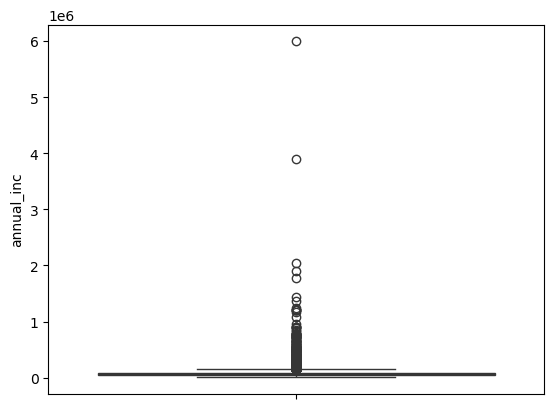

In [311]:
sns.boxplot(cleaned_loan_df['annual_inc'])

<Axes: ylabel='emp_length'>

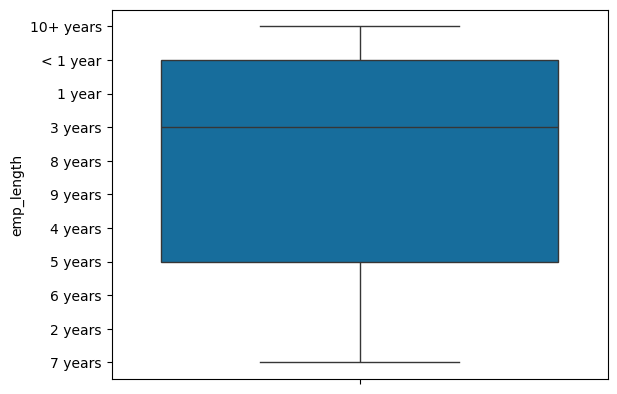

In [313]:
sns.boxplot(cleaned_loan_df['emp_length'])

In [314]:
cleaned_loan_df.annual_inc.describe()
cleaned_loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64

<Axes: ylabel='annual_inc'>

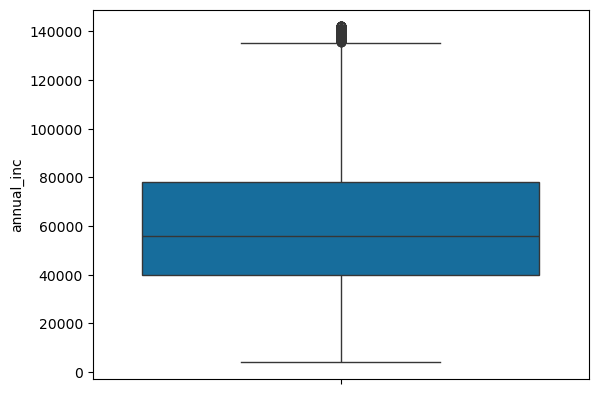

In [317]:
quan_val= cleaned_loan_df.annual_inc.quantile(0.95)
Outlier_clean_df= cleaned_loan_df[cleaned_loan_df.annual_inc <= quan_val]   
sns.boxplot(Outlier_clean_df['annual_inc'])

In [318]:
Outlier_clean_df.shape

(37743, 26)

<Axes: ylabel='loan_amnt'>

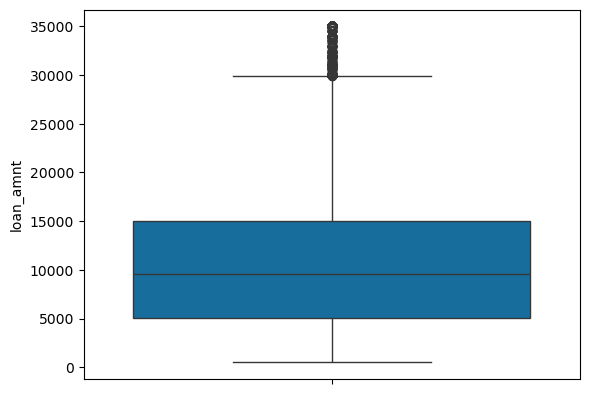

In [322]:
sns.boxplot(Outlier_clean_df['loan_amnt'])

In [324]:
Outlier_clean_df['int_rate']=Outlier_clean_df['int_rate'].astype(str)
Outlier_clean_df['int_rate']=Outlier_clean_df['int_rate'].apply(lambda x : x.replace('%',''))
Outlier_clean_df['int_rate']=Outlier_clean_df['int_rate'].astype(float)

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/522805397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Outlier_clean_df['int_rate']=Outlier_clean_df['int_rate'].astype(str)
/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/522805397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Outlier_clean_df['int_rate']=Outlier_clean_df['int_rate'].apply(lambda x : x.replace('%',''))
/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/522805397.py:3: SettingWithCo

In [326]:
Outlier_clean_df.funded_amnt_inv.describe()

count    37743.000000
mean     10061.780724
std       6836.297153
min          0.000000
25%       5000.000000
50%       8500.000000
75%      13967.324365
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

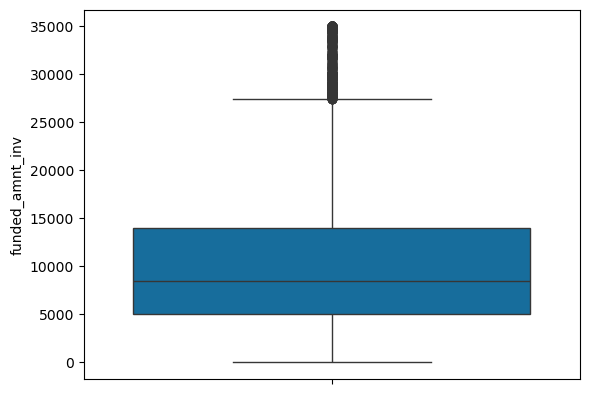

In [328]:

sns.boxplot(Outlier_clean_df['funded_amnt_inv'])


<Axes: xlabel='loan_status'>

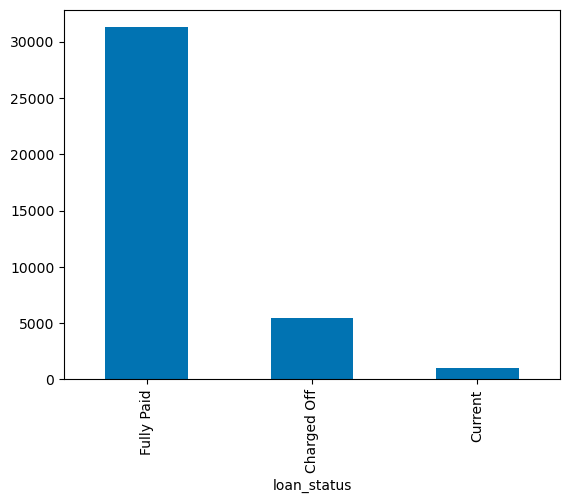

In [330]:
count_df = Outlier_clean_df['loan_status'].value_counts()

# Plotting the count as a bar chart
count_df.plot(kind='bar')

In [332]:
Outlier_clean_df = ( Outlier_clean_df[Outlier_clean_df['loan_status']!= "Current" ])

In [334]:
Outlier_clean_df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39711     Fully Paid
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 36689, dtype: object

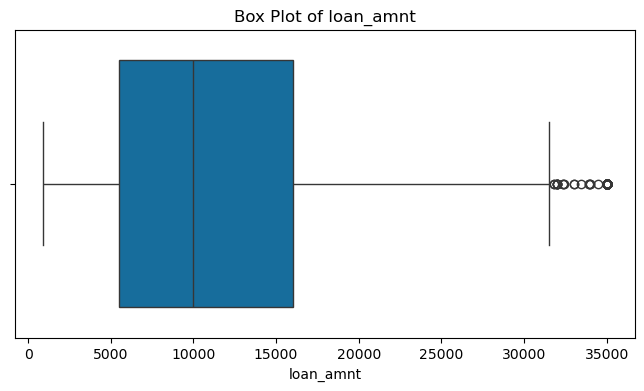

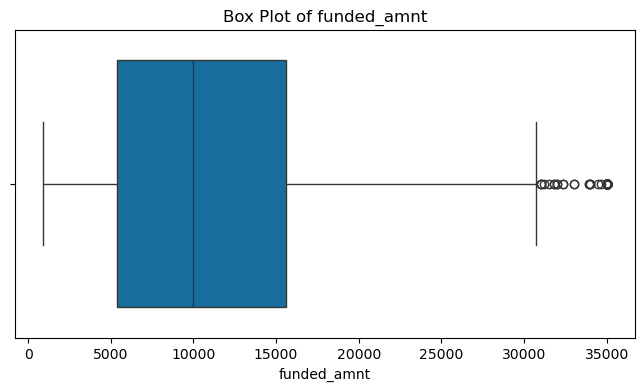

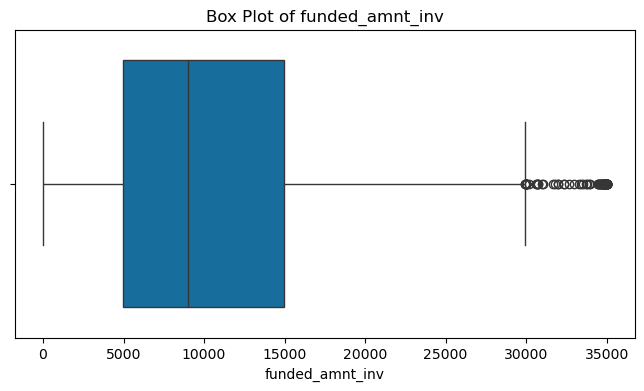

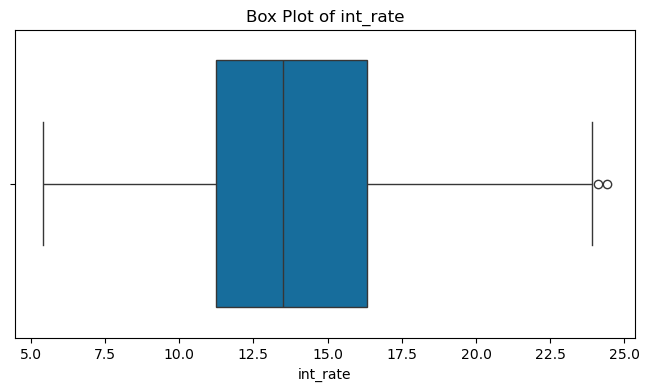

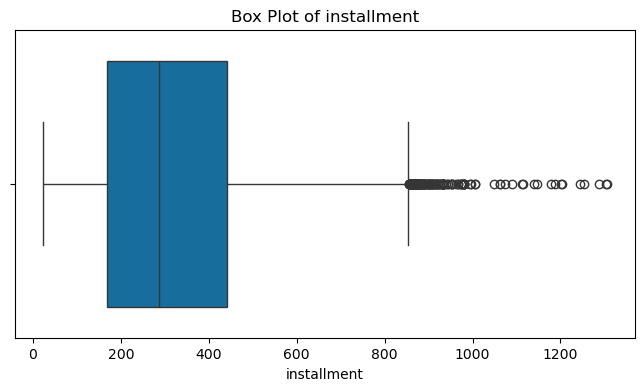

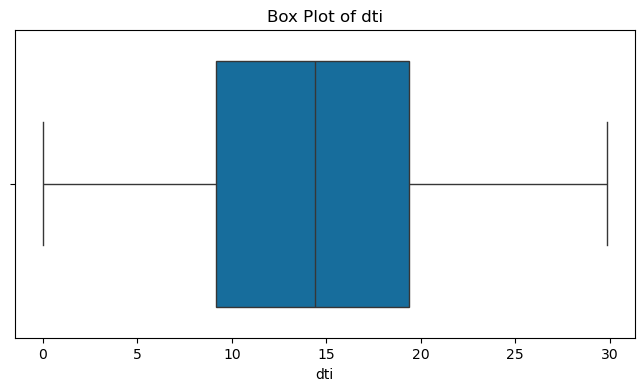

In [336]:
charged_off= Outlier_clean_df[Outlier_clean_df['loan_status']== "Charged Off" ]
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=charged_off[col])  # Use y for vertical box plots
    plt.title(f'Box Plot of {col}')
    plt.show()

In [339]:
#considering only charged_off 
charged_off= Outlier_clean_df[Outlier_clean_df['loan_status']== "Charged Off" ]

# 2. Univeriate Analysis 

In [344]:
charged_off.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

#### <font color = blue> Analysis: Applicants employeed for more than 10 years accounting for highest number of "charged off"

In [347]:
cleaned_loan_df.emp_length.mode()
cleaned_loan_df.emp_length.info()
percentage = cleaned_loan_df['emp_length'].value_counts(normalize=True) * 100
percentage

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


emp_length
10+ years    22.977589
< 1 year     11.860152
2 years      11.355520
3 years      10.597278
4 years       8.891879
5 years       8.493349
1 year        8.384659
6 years       5.768335
7 years       4.588272
8 years       3.827442
9 years       3.255525
Name: proportion, dtype: float64

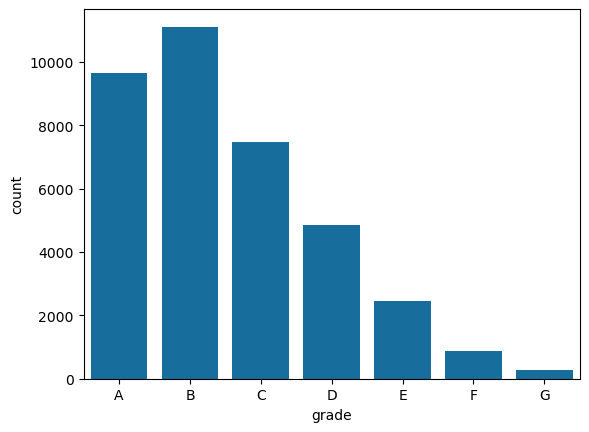

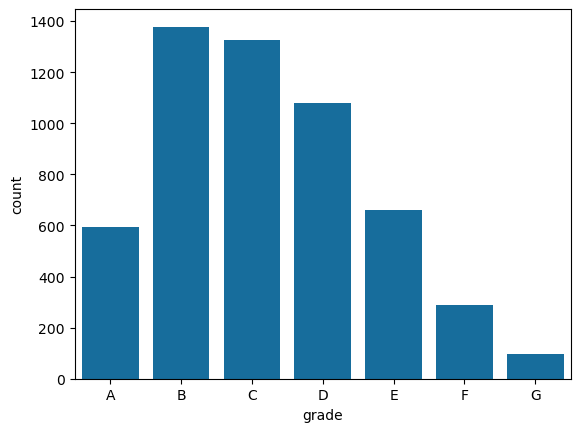

In [349]:

sns.set_palette('colorblind')
sns.countplot(x=Outlier_clean_df['grade'],order=['A','B','C','D','E','F','G'])
plt.show()
sns.countplot(x=charged_off['grade'],order=['A','B','C','D','E','F','G'])
plt.show()

#### <font color = blue> Analysis: Applicants belonging to "grade B" accounted for highest number of "charged off"

In [351]:
#sns.countplot(x=Outlier_clean_df['sub_grade'])

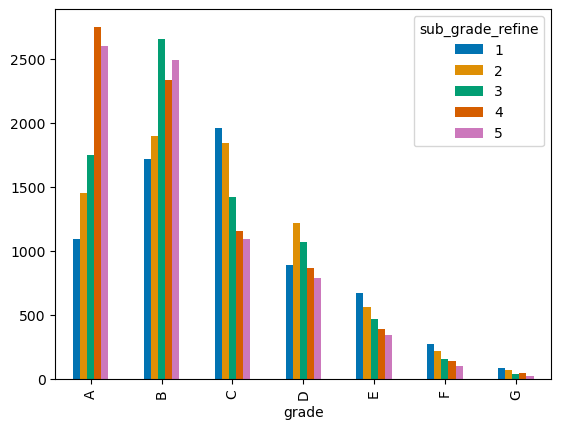

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/2806773824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['sub_grade_refine'] = pd.to_numeric(charged_off.sub_grade.apply(lambda x : x[-1]))


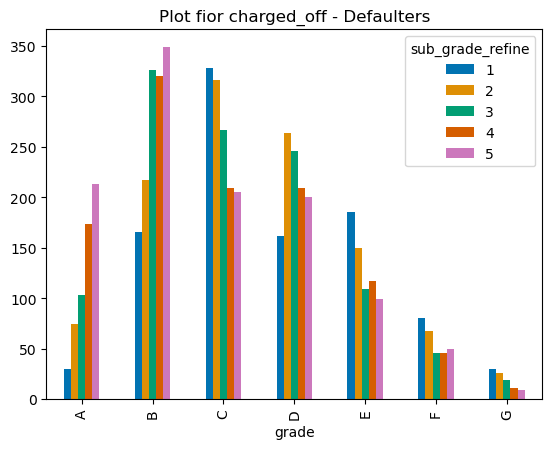

In [352]:
Outlier_clean_df['sub_grade_refine'] = pd.to_numeric(Outlier_clean_df.sub_grade.apply(lambda x : x[-1]))
Outlier_clean_df.sub_grade_refine.head()
count_df=Outlier_clean_df.groupby(['grade', 'sub_grade_refine']).size().unstack(fill_value=0)
count_df.plot(kind='bar')
plt.show()

charged_off['sub_grade_refine'] = pd.to_numeric(charged_off.sub_grade.apply(lambda x : x[-1]))
charged_off.sub_grade_refine.head()
charged_off_count_df=charged_off.groupby(['grade', 'sub_grade_refine']).size().unstack(fill_value=0)
charged_off_count_df.plot(kind='bar')
plt.title("Plot fior charged_off - Defaulters")
plt.show()

#### <font color = blue> Analysis: Applicants belonging to "Sub grade B5" accounted for highest number of "charged off"

In [356]:
#Distribution of interest rate 

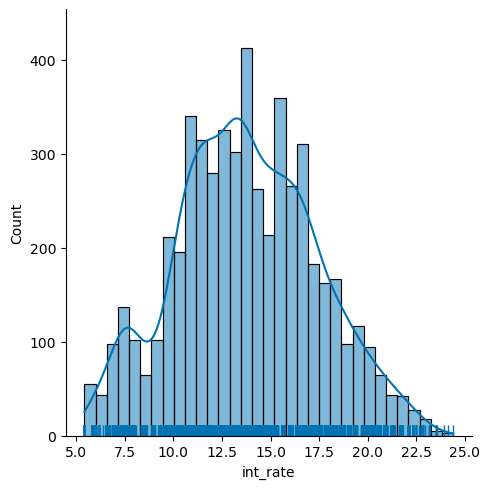

In [357]:
sns.displot(charged_off['int_rate'],kde=True,rug = True)
plt.show()

#### <font color = blue> Analysis : This shows avg or most of interest rates are in range of 13-17% for charged off aplicants 

<Axes: xlabel='count', ylabel='term'>

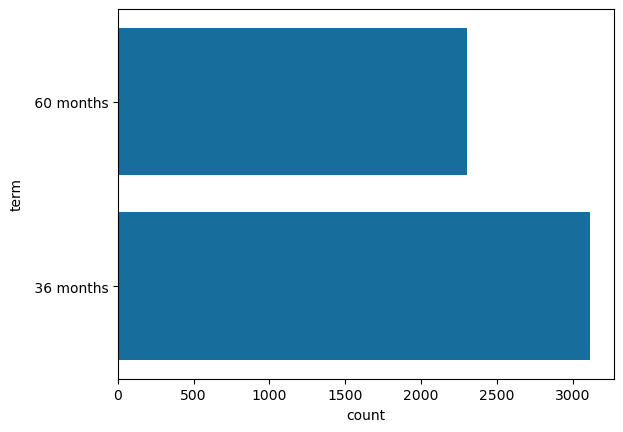

In [359]:
sns.countplot(y='term', data=charged_off)

#### <font color  = blue> Analysis : Applicants with term of 36 months likely to be "charged off"

In [361]:
charged_off['issue_d'].value_counts

<bound method IndexOpsMixin.value_counts of 1        Dec-11
8        Dec-11
9        Dec-11
12       Dec-11
14       Dec-11
          ...  
39653    Sep-07
39666    Aug-07
39667    Aug-07
39668    Aug-07
39678    Aug-07
Name: issue_d, Length: 5421, dtype: object>

In [363]:
charged_off['issue_month'] = charged_off['issue_d'].str.split("-", expand=True)[0]
charged_off['issue_year'] = '20' + charged_off['issue_d'].str.split("-", expand=True)[1]

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/2974415867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['issue_month'] = charged_off['issue_d'].str.split("-", expand=True)[0]
/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/2974415867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['issue_year'] = '20' + charged_off['issue_d'].str.split("-", expand=True)[1]


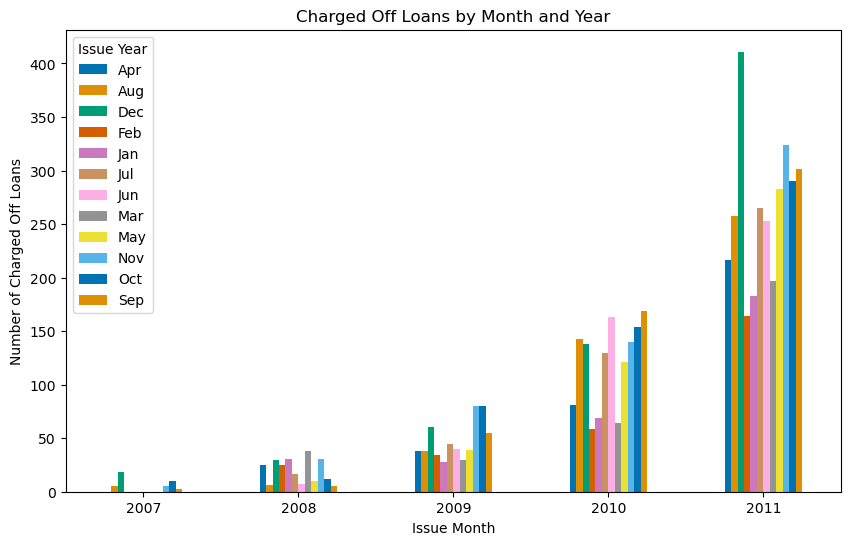

In [364]:
count_df=charged_off.groupby(['issue_year','issue_month']).size().unstack(fill_value=0)
count_df = count_df.sort_index()
count_df.plot(kind='bar', figsize=(10, 6))
plt.title('Charged Off Loans by Month and Year')
plt.xlabel('Issue Month')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=0)
plt.legend(title='Issue Year')
plt.show()


#### <font color = blue> Analysis : Dec month of 2011 have max "Charged Off " applicants 

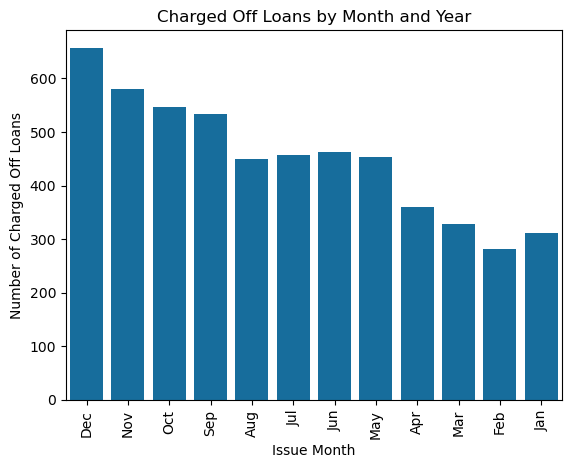

In [367]:
charged_off_2011 = charged_off[charged_off['issue_year'] == '2011']
sns.countplot(x ='issue_month', data=charged_off)
plt.title('Charged Off Loans by Month and Year')
plt.xlabel('Issue Month')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=90)
plt.show()

#### <font color = blue> Analysis : Dec month of 2011 have max "Charged Off " applicants 

<Axes: xlabel='count', ylabel='purpose'>

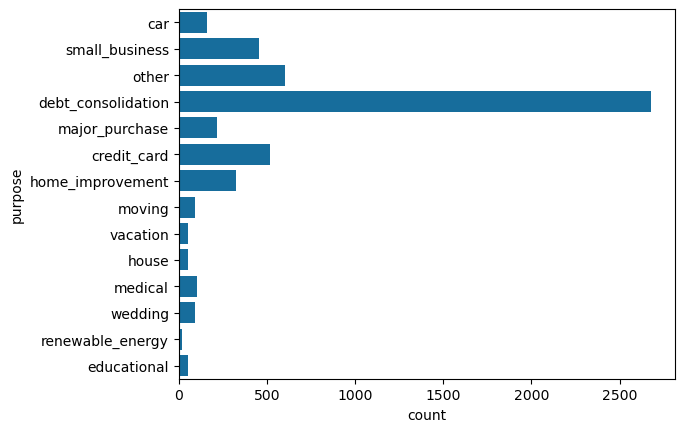

In [369]:
sns.countplot(y ='purpose', data=charged_off)

#### <font color = blue> Analysis : Applicants with purpose of "dept consideration" accounting for charged off

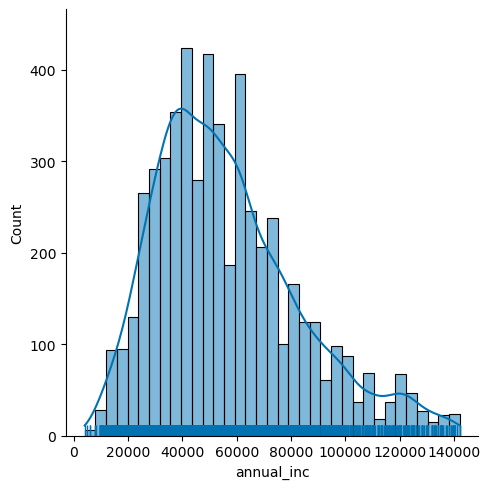

In [372]:


sns.displot(charged_off['annual_inc'],kde=True,rug = True)
plt.show()

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/1415010629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['annual_inc_bucket'] = pd.cut(charged_off['annual_inc'], bins=6,precision =0,labels=['0-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k- above'])


<Axes: xlabel='annual_inc_bucket', ylabel='count'>

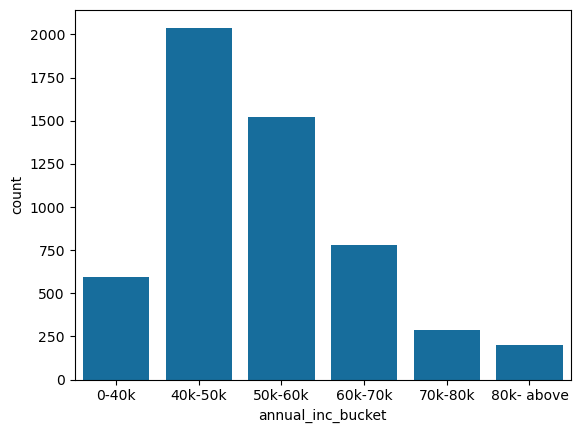

In [374]:
charged_off['annual_inc_bucket'] = pd.cut(charged_off['annual_inc'], bins=6,precision =0,labels=['0-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k- above'])

sns.countplot(x ='annual_inc_bucket', data=charged_off)

#### <font color = blue> Analysis : Applicants with annual income of 40-50K accounting for charged off

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/90554129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['loan_amnt_bucket'] = pd.cut(charged_off['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30K','30K-35K'])


<Axes: xlabel='loan_amnt_bucket', ylabel='count'>

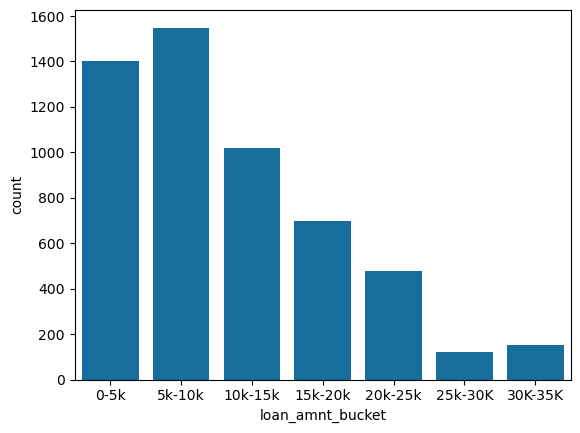

In [378]:
charged_off['loan_amnt_bucket'] = pd.cut(charged_off['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30K','30K-35K'])

sns.countplot(x ='loan_amnt_bucket', data=charged_off)


#### <font color = blue> Analysis : Applicants with loan ammount of 5-10K are mostly being defaulters . 

### 
---------------------------------------------------------------------
Summary of "Univariate Analysis"  ----  Applicants likely to default are : 

---------------------------------------------------------------------
- Grade is 'B'
- Sub grade of 'B5'
- Applicants who have interest rate of 10-17%
- Applicants who have annual income ranging 40-60K 
- Applicants having employement length of 10+
- Applicants with loan ammount of 5-10K 
- Term of 36 months
- Applicants with  the purpose of 'debt_consolidation'
- Applicants who are issued loan in Dec month of 2011 : may be cause thats the month of holidays 

# 3. Bivariate Analysis 

### A) grade with loan_status analysis

<Axes: xlabel='grade', ylabel='count'>

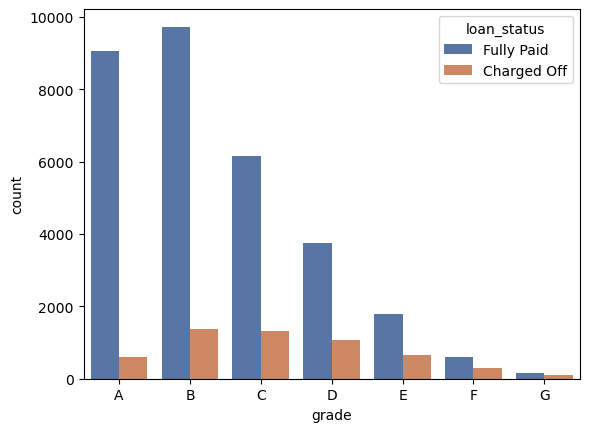

In [385]:
sns.countplot(data=Outlier_clean_df, x='grade', hue='loan_status', palette='deep',order =['A','B','C','D','E','F','G'] )


#### <font color = blue> Observation : applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.



### B) State with loan status 

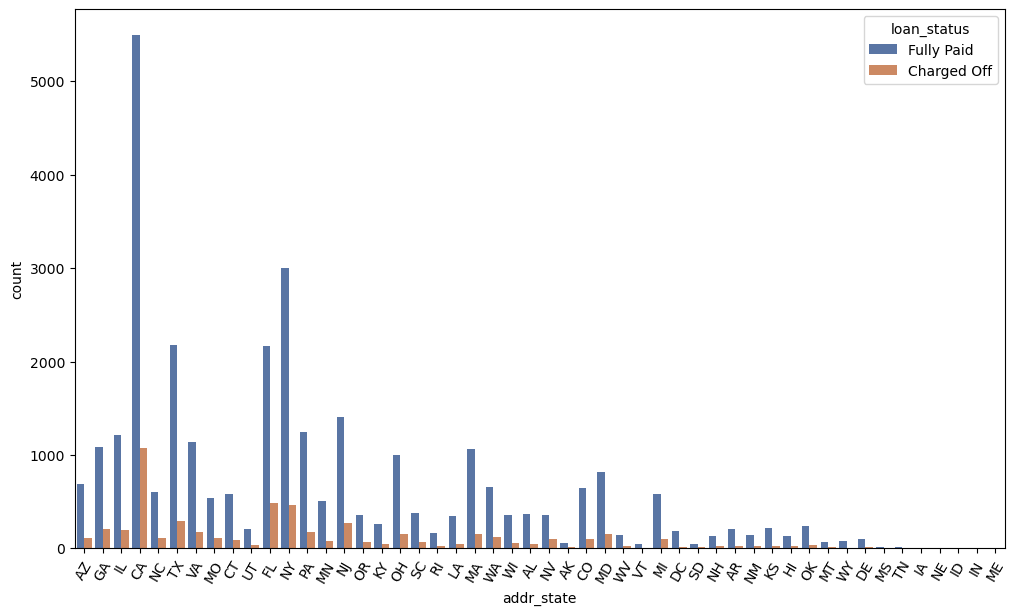

In [391]:

plt.figure(figsize=(12, 7))
sns.countplot(data=Outlier_clean_df, x='addr_state', hue='loan_status', palette='deep' )
plt.xticks(rotation=60)
plt.show()


#### <font color = blue>OBSERVATION : Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.

### C)  loan_status with subgrade Analysis

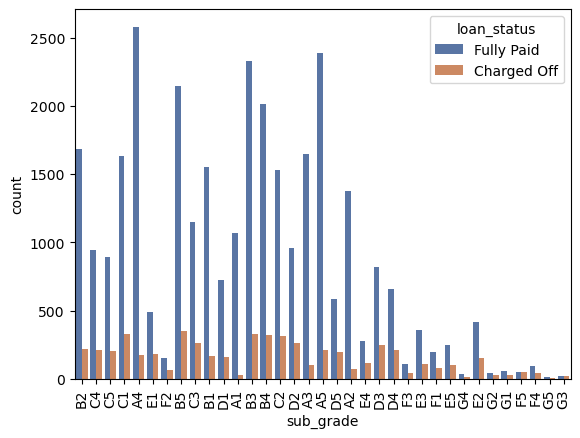

In [397]:
sns.countplot(data=Outlier_clean_df, x='sub_grade', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

#### <FONT COLOR = BLUE> OBSERVATION: Loan applicants belonging to Sub Grades B3, B4,B5 ,C1,C2 are more likely to charge off.

### D) Home Ownership with Loan Status analysis 

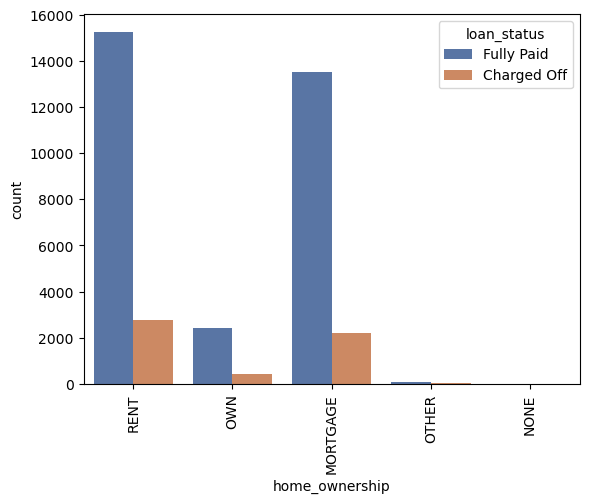

In [402]:
sns.countplot(data=Outlier_clean_df, x='home_ownership', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

#### <FONT COLOR = BLUE> OBSERVATION: Loan applicants mortgaging or renting house are more likely to charge off.

### E) loan_amnt_bucket with  int_rate analysis  : 

In [405]:
Outlier_clean_df['loan_amnt_bucket'] = pd.cut(Outlier_clean_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30K','30K-35K'])

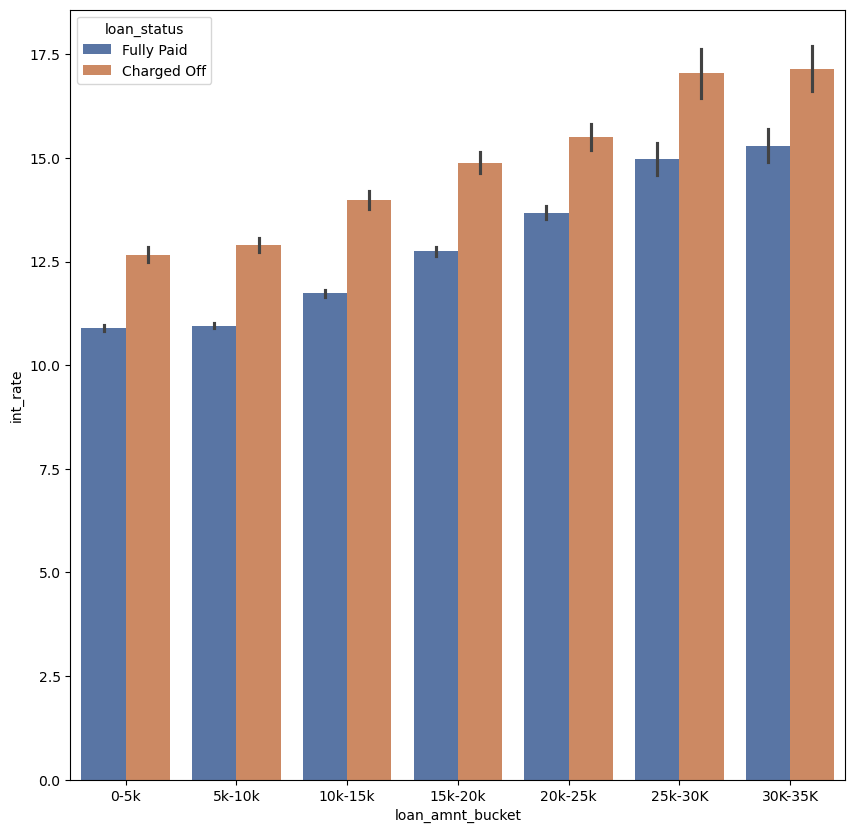

In [406]:
plt.figure(figsize=(10,10))
sns.barplot(data =Outlier_clean_df,x='loan_amnt_bucket', y='int_rate', hue ='loan_status',palette="deep")
plt.show()

#### <font color = blue> OBSERVATION : loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%

### F) loan_amnt with purpose :

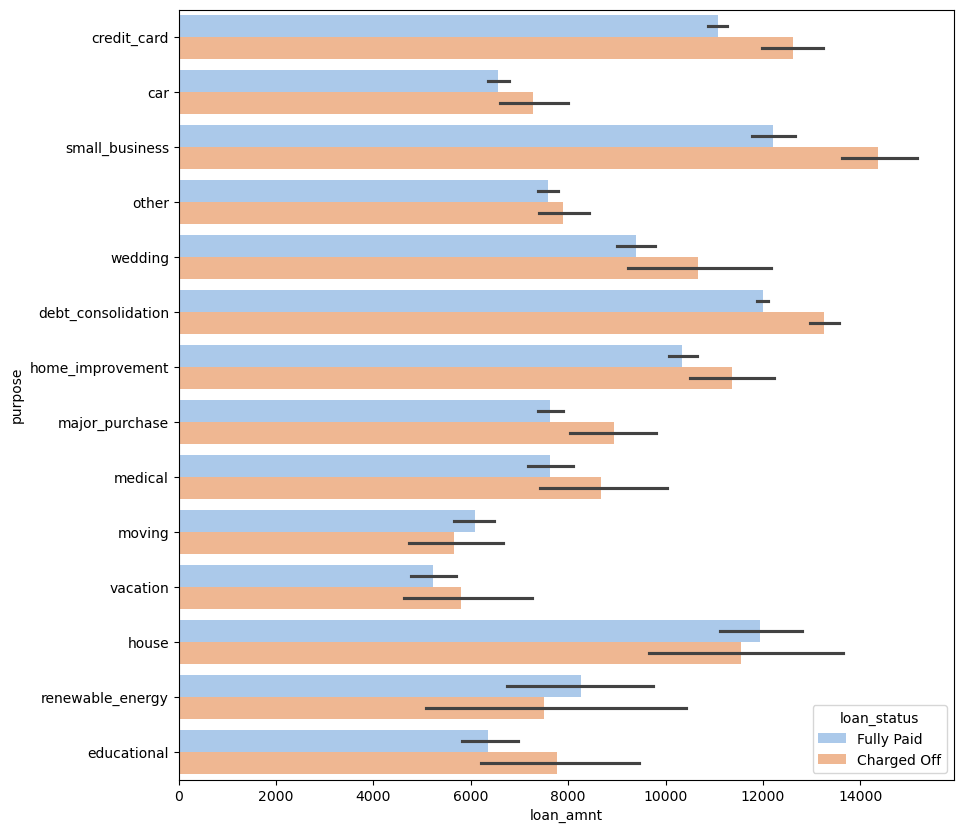

In [409]:
plt.figure(figsize=(10,10))
sns.barplot(data =Outlier_clean_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### <font color = blue> OBSERVATION : If applicant has taken "high amount of loan" for "Small Bussiness" , is likely to be a defaulter 

### G) loan_amnt with month analysis
### H) loan_amnt with year analysis   

In [414]:
Outlier_clean_df['issue_month'] = Outlier_clean_df['issue_d'].str.split("-", expand=True)[0]
Outlier_clean_df['issue_year'] = '20' + Outlier_clean_df['issue_d'].str.split("-", expand=True)[1]

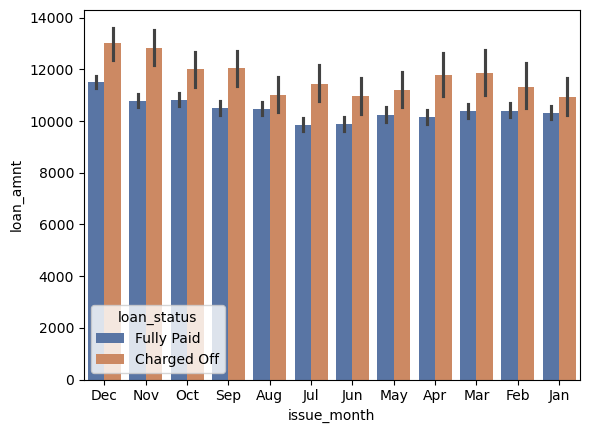

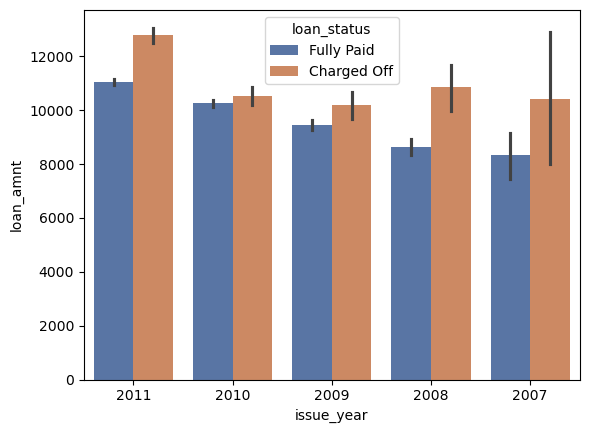

In [415]:
sns.barplot(data =Outlier_clean_df,y='loan_amnt', x='issue_month', hue ='loan_status',palette="deep")
plt.show()
sns.barplot(data =Outlier_clean_df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="deep")
plt.show()

#### <font color = blue> OBSERVATION : loan applicants has increased from 2007 to 2011 and especially in DEC month . 

### I) loan_amnt with grade analysis¶

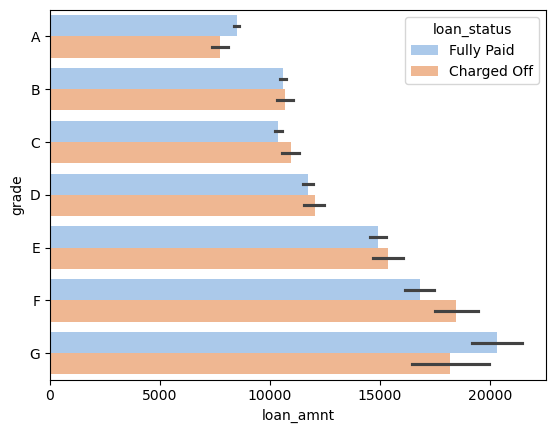

In [418]:
sns.barplot(data =Outlier_clean_df,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### <font color = blue> OBSERVATION: loan applicants who defaulted have loan amounts of $12,000 or higher.

### J) int_rate with grade analysis

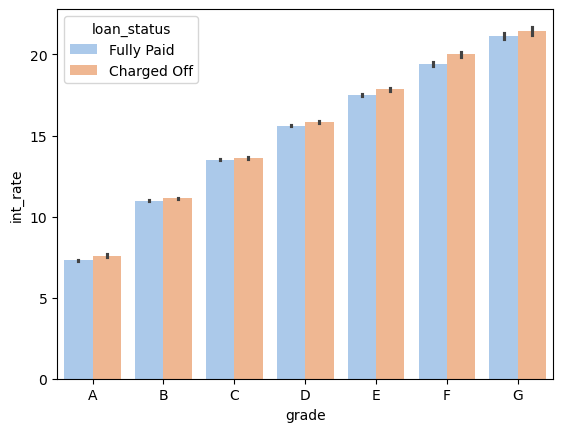

In [422]:
sns.barplot(data =Outlier_clean_df,x='grade', y='int_rate', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### <font color = blue> OBSERVATION: - loan applicants who defaulted received loans with interest rates > than  13% 


### K) loan_amnt with emp_length analysis

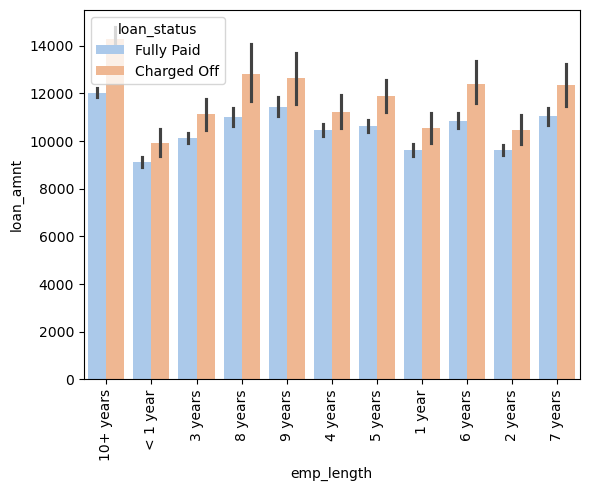

In [425]:

sns.barplot(data =Outlier_clean_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.xticks(rotation=90) 
plt.show()

#### <font color = blue>OBSERVATION : Applicant with more than 10 years of emp length taken more amount of loan and are likely to be a defaulter.

### loan amount bucket with intrest rate analysis

<Axes: xlabel='loan_amnt_bucket', ylabel='int_rate'>

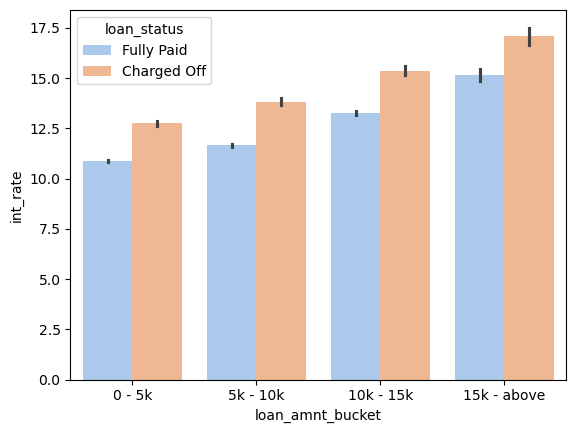

In [430]:
Outlier_clean_df['loan_amnt_bucket'] = pd.cut(Outlier_clean_df['loan_amnt'], bins=4,precision =0,labels=['0 - 5k', '5k - 10k', '10k - 15k', '15k - above'])

sns.barplot(data =Outlier_clean_df,y ='int_rate', x ='loan_amnt_bucket', hue ='loan_status',palette="pastel")

<Axes: xlabel='annual_inc_bucket', ylabel='int_rate'>

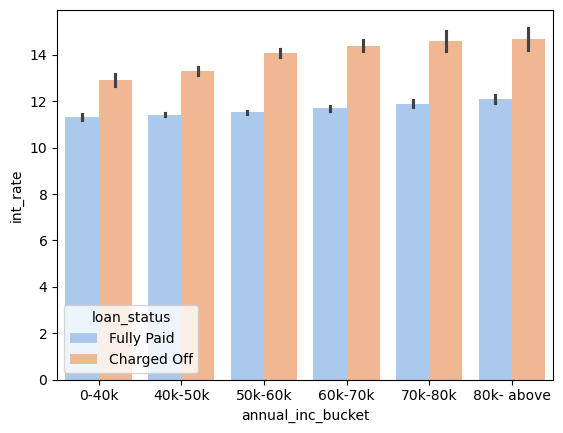

In [431]:
Outlier_clean_df['annual_inc_bucket'] = pd.cut(Outlier_clean_df['annual_inc'], bins=6,precision =0,labels=['0-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k- above'])

sns.barplot(data =Outlier_clean_df,y ='int_rate', x ='annual_inc_bucket', hue ='loan_status',palette="pastel")

###  employment lenght with loan status 


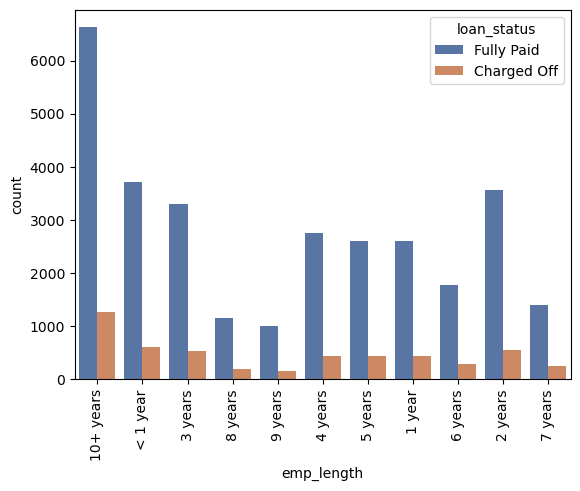

In [433]:
sns.countplot(data=Outlier_clean_df, x='emp_length', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

### annual income with loan status 

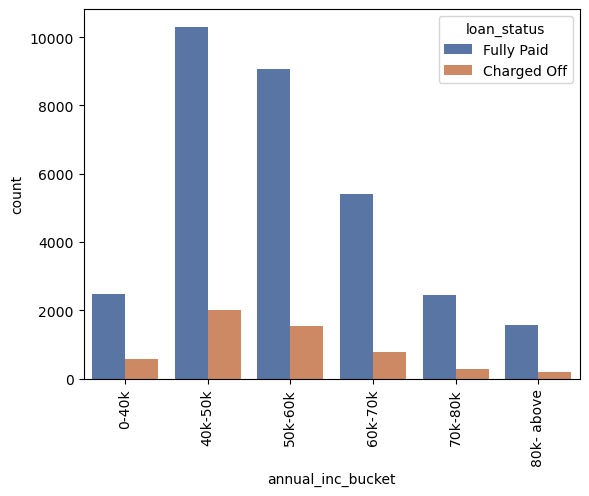

In [435]:
Outlier_clean_df['annual_inc_bucket'] = pd.cut(Outlier_clean_df['annual_inc'], bins=6,precision =0,labels=['0-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k- above'])

sns.countplot(data=Outlier_clean_df, x='annual_inc_bucket', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

### funded ammount vs loan status 

In [438]:
Outlier_clean_df['annual_inc'].mode()

0    60000.0
Name: annual_inc, dtype: float64

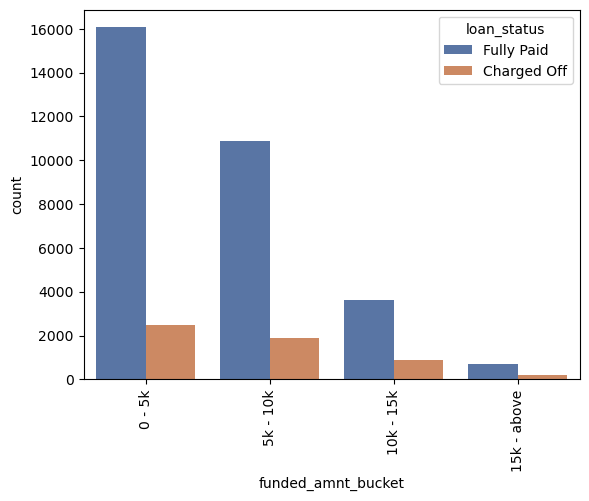

In [439]:
Outlier_clean_df['funded_amnt_bucket'] = pd.cut(Outlier_clean_df['funded_amnt'], bins=4,precision =0,labels=['0 - 5k', '5k - 10k', '10k - 15k', '15k - above'])

sns.countplot(data=Outlier_clean_df, x='funded_amnt_bucket', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

### loan_amnt vs loan status

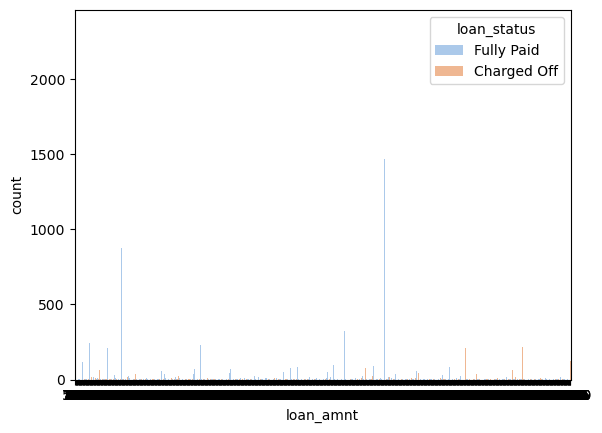

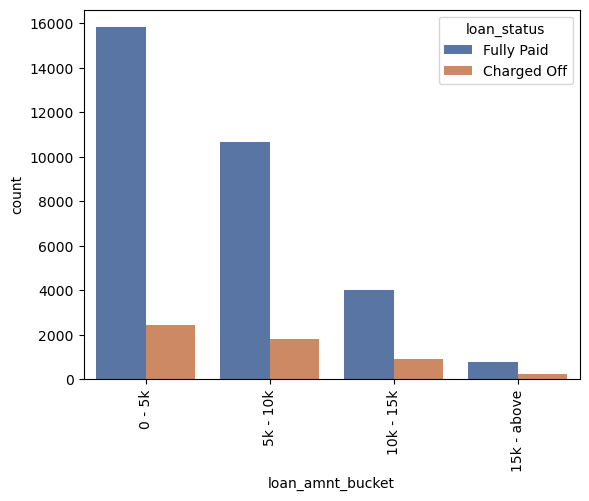

In [442]:
sns.countplot(data =Outlier_clean_df,x='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()

Outlier_clean_df['loan_amnt_bucket'] = pd.cut(Outlier_clean_df['loan_amnt'], bins=4,precision =0,labels=['0 - 5k', '5k - 10k', '10k - 15k', '15k - above'])

sns.countplot(data=Outlier_clean_df, x='loan_amnt_bucket', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

### dti with loan status 

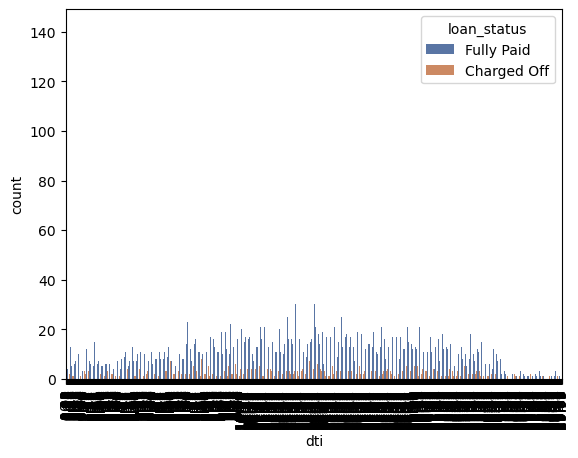

In [444]:
sns.countplot(data=Outlier_clean_df, x='dti', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

In [446]:
Outlier_clean_df['dti_bucket'] = pd.cut(Outlier_clean_df['dti'], bins=5,precision =0,labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


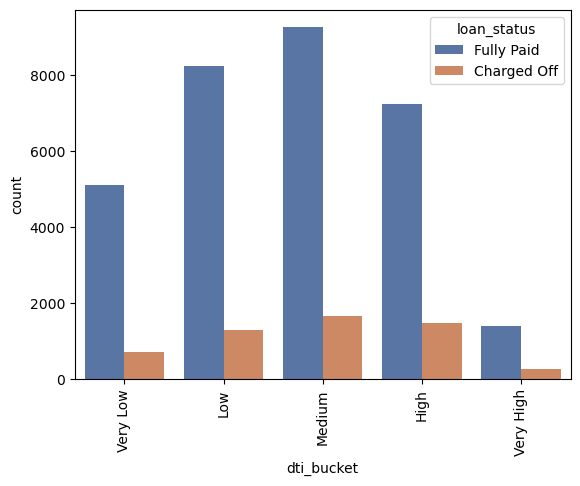

In [447]:
sns.countplot(data=Outlier_clean_df, x='dti_bucket', hue='loan_status', palette='deep' )
plt.xticks(rotation=90)
plt.show()

### Summary of Bivariate Aalysis: 

- loan applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.
- Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.
- Loan applicants belonging to Sub Grades B3, B4, and B5 are more likely to charge off.
- Loan applicants mortgaging or renting house are more likely to charge off.
- loan applicants who defaulted received loans with interest rates greater than 13% 
- If applicant has taken "high amount of loan" for "Small Bussiness" , is likely to be a defaulter
- loan applicants has increased from 2007 to 2011 and especially in DEC month
- Applicant with more than 10 years of emp length is likely to be a defaulter.
- Applicant with more than 10 years of emp length taken more amount of loan and are likely to be a defaulter.
- Loan applicants applying for loans with a 60-month term are more likely to default than those taking loans for 36 months.
- Debt consolidation  is purpose where the maximum number of loans are issued, and people have defaulted the most in the same category.
- loan applicants who defaulted received loan amounts of $15,000 or higher.
- loan applicants who charged off had medium to high Debt-to-Income (DTI) ratios.
- loan applicants who charged off reported an annual income of less 40K - 50K

## 4. Multivariate Analysis

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/3043720404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = Outlier_clean_df.groupby(['purpose', 'annual_inc_bucket']).size().unstack(fill_value=0)


<Axes: xlabel='annual_inc_bucket', ylabel='purpose'>

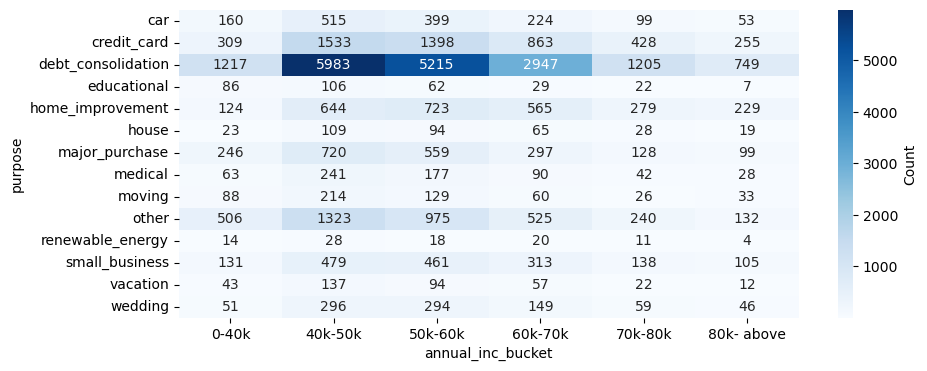

In [494]:
heatmap_data = Outlier_clean_df.groupby(['purpose', 'annual_inc_bucket']).size().unstack(fill_value=0)
    
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    

#### <FONT COLOR = BLUE> OBSERVATION : Debt consolidation is the category where the maximum number of loans are issued, and people have defaulted the most in the same category.

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/1024887406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = Outlier_clean_df.groupby(['loan_amnt_bucket', 'annual_inc_bucket']).size().unstack(fill_value=0)


<Axes: xlabel='annual_inc_bucket', ylabel='loan_amnt_bucket'>

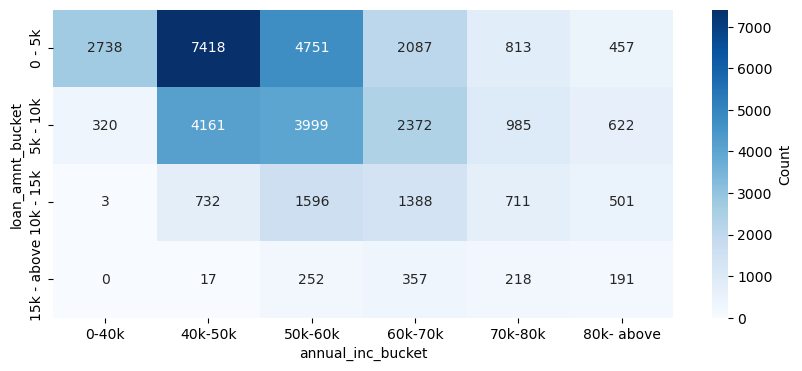

In [454]:
heatmap_data = Outlier_clean_df.groupby(['loan_amnt_bucket', 'annual_inc_bucket']).size().unstack(fill_value=0)
    
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    

#### <FONT COLOR = BLUE> OBSERVATION : Low annual income applicant seems to be defaulter. ( below 50k)

In [456]:
Outlier_clean_df.nunique()

loan_amnt                 854
funded_amnt               988
funded_amnt_inv          7576
term                        2
int_rate                  370
installment             14587
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               4802
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
addr_state                 50
dti                      2848
delinq_2yrs                11
open_acc                   40
total_acc                  81
total_pymnt             34939
total_pymnt_inv         34618
total_rec_prncp          6593
last_pymnt_d              101
last_pymnt_amnt         32795
pub_rec_bankruptcies        3
sub_grade_refine            5
loan_amnt_bucket            4
issue_month                12
issue_year                  5
annual_inc_bucket           6
funded_amnt_bucket          4
dti_bucket                  5
dtype: int

In [457]:
selected_columns = ['loan_amnt', 'term','annual_inc','dti','funded_amnt','int_rate','emp_length','installment']
corr_df=Outlier_clean_df[selected_columns]

In [459]:
# mapping emp lenghth 

In [461]:
emp_length_map: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

corr_df['emp_length'] = corr_df['emp_length'].map(emp_length_map)

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/2432288550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['emp_length'] = corr_df['emp_length'].map(emp_length_map)


In [462]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36689 entries, 0 to 39716
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_amnt    36689 non-null  int64  
 1   term         36689 non-null  object 
 2   annual_inc   36689 non-null  float64
 3   dti          36689 non-null  float64
 4   funded_amnt  36689 non-null  int64  
 5   int_rate     36689 non-null  float64
 6   emp_length   35675 non-null  float64
 7   installment  36689 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.5+ MB


In [463]:
# convert term to float

In [464]:
corr_df['term']= corr_df['term'].apply(lambda x: x.split('months')[0])
corr_df['term'] = corr_df['term'].astype(float)

/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/1683964912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['term']= corr_df['term'].apply(lambda x: x.split('months')[0])
/var/folders/kg/j0k14cy561xfp4_7m2wtj0sh0000gn/T/ipykernel_99326/1683964912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['term'] = corr_df['term'].astype(float)


In [465]:
corr = corr_df.corr()
corr

,loan_amnt,term,annual_inc,dti,funded_amnt,int_rate,emp_length,installment
loan_amnt,1.000000,0.349923,0.402650,0.089837,0.981950,0.291412,0.150951,0.931487
term,0.349923,1.000000,0.079758,0.078570,0.329146,0.435785,0.107576,0.092065
annual_inc,0.402650,0.079758,1.000000,-0.073651,0.398472,0.053627,0.194180,0.397676
dti,0.089837,0.078570,-0.073651,1.000000,0.089076,0.111762,0.058453,0.079000
funded_amnt,0.981950,0.329146,0.398472,0.089076,1.000000,0.296481,0.150624,0.957119
int_rate,0.291412,0.435785,0.053627,0.111762,0.296481,1.000000,-0.002212,0.269462
emp_length,0.150951,0.107576,0.194180,0.058453,0.150624,-0.002212,1.000000,0.122321
installment,0.931487,0.092065,0.397676,0.079000,0.957119,0.269462,0.122321,1.000000


<Axes: >

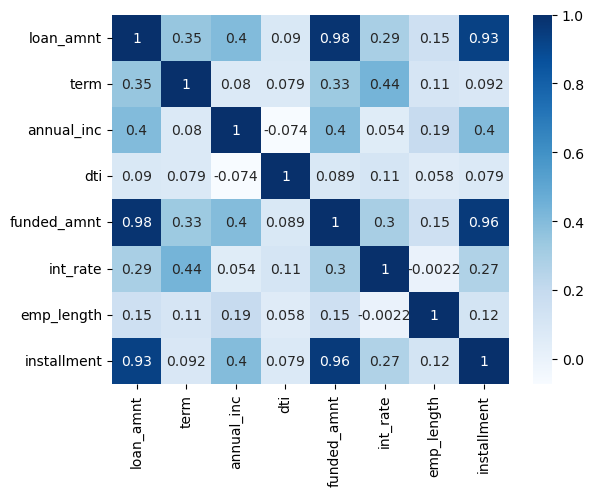

In [466]:
sns.heatmap(corr, annot=True, cmap="Blues")

### <font color = Blue> Observation : 

### 1- Positive Correlation : 

- Loan amount and installment have strong correlation 
- annual income and loan amount have strong correlation 
- funded amount and loan amount have strong correlation 
- term and Interest rate have strong relation 

### 2. Week Correlation
   
- dti have no correlation with any of field .


### 3. Negetive correlation
   
- dti have negetive correlation with annual income
- emp length have negetive correlation with interest rate


 

# <font color = blue> Key Insights on Loan Default Risk


- Credit Grade: Applicants in grades B, C, and D are significantly more likely to default.
- Sub-Grade Risk: Higher default rates are observed in sub-grades B3, B4, B5, and C1.
- Employment Length: Applicants with 10+ years of employment are more prone to default.
- Geographic Factors: Higher default rates are concentrated in states CA, FL, and NJ.
- Housing Situation: Renters and mortgaged homeowners are at greater risk of defaulting.
- Income Level: Lower annual income correlates with higher default likelihood.
- Interest Rates: Default risk increases with rising interest rates.